In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Cargar los datos
df = pd.read_csv('E:/Bootcamp/examendojo/advanced/marketing_campaign.csv', delimiter='\t')
# Manejo de valores nulos
df['Income'].fillna(df['Income'].median(), inplace=True)

# Convertir 'Dt_Customer' a formato de fecha
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Seleccionar columnas numéricas para normalización
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Normalizar los datos numéricos
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# Interpretación y Tratamiento de Outliers
print("\n--- Interpretación y Tratamiento de Preprocesamiento de datos ---")
print("""
1. Como el dataset tiene un formato en el cual todas las columnas estan comprimidas en una sola, con la funcion delimiter se busca adaptar el dataset para la lectura de datos
2. Se encontraron 24 valores nulos en la columna "Income", los cuales fueron reemplazados con la mediana de los ingresos.
3. Las columnas numéricas han sido normalizadas y la columna de fecha "Dt_Customer" se ha convertido al formato de fecha adecuado
""")



--- Interpretación y Tratamiento de Preprocesamiento de datos ---

1. Como el dataset tiene un formato en el cual todas las columnas estan comprimidas en una sola, con la funcion delimiter se busca adaptar el dataset para la lectura de datos
2. Se encontraron 24 valores nulos en la columna "Income", los cuales fueron reemplazados con la mediana de los ingresos.
3. Las columnas numéricas han sido normalizadas y la columna de fecha "Dt_Customer" se ha convertido al formato de fecha adecuado



C:\Users\chave\AppData\Local\Temp\ipykernel_17552\1801627727.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [2]:
# Aplicar PCA
pca = PCA(n_components=0.90)  # Captura al menos el 90% de la varianza explicada
pca_result = pca.fit_transform(df[numeric_columns])

# Visualizar la varianza explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

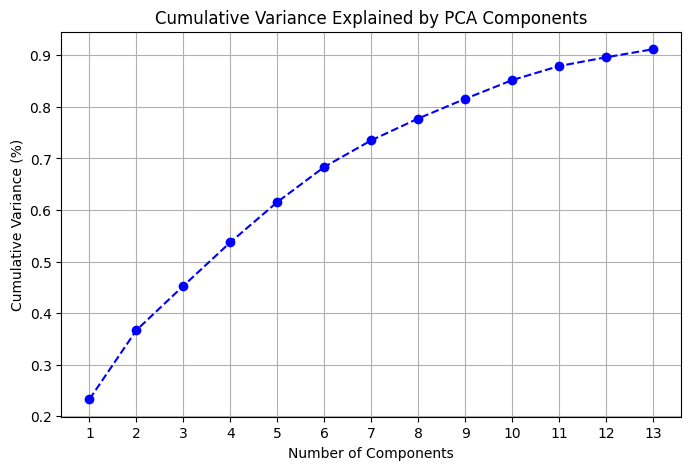


--- Interpretación del Analisis no Supervisado ---

1. PCA: Se aplica la reducción de dimensionalidad para capturar al menos el 90%, de la varianza
2. Se normaliza los datos y luego se transforma el espacio de características para que las nuevas características sean combinaciones lineales de las originales.
3. Se analiza la varianza explicada por cada componente principal y cómo se acumula.
4. Finalmente, se visualiza la proyección de los datos en el nuevo espacio de los componentes principales.



In [3]:
# Graficar la varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.xticks(range(1, len(cumulative_variance) + 1))  # Añadir ticks en el eje x
plt.grid(True)
plt.show()
print("\n--- Interpretación del Analisis no Supervisado ---")
print("""
1. PCA: Se aplica la reducción de dimensionalidad para capturar al menos el 90%, de la varianza
2. Se normaliza los datos y luego se transforma el espacio de características para que las nuevas características sean combinaciones lineales de las originales.
3. Se analiza la varianza explicada por cada componente principal y cómo se acumula.
4. Finalmente, se visualiza la proyección de los datos en el nuevo espacio de los componentes principales.
""")

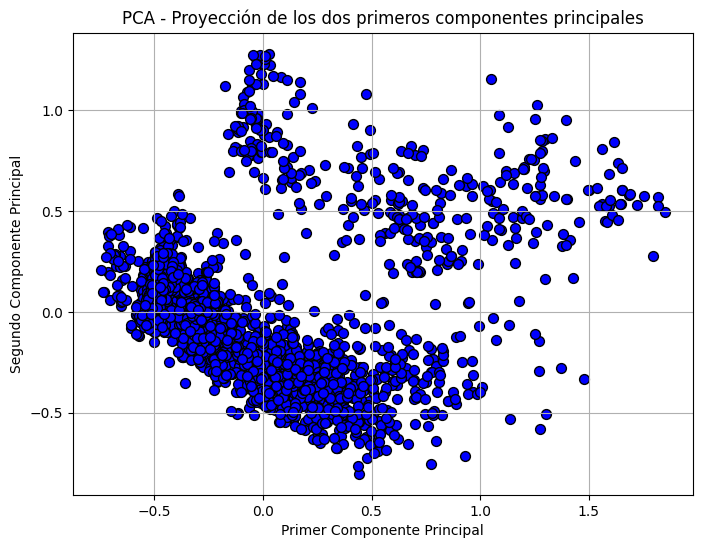


--- ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes? ---

Se puede ver que después del quinto componente, la curva comienza a estabilizarse, lo que significa que los primeros componentes explican la mayor parte de la varianza. 
Con solo los primeros 6-8 componentes se puede explicar más del 80%, de la varianza de los datos. 
Esto indica que gran parte de la información contenida en las variables originales puede ser capturada con un número relativamente pequeño de componentes.
Primeros componentes: Los primeros componentes principales tienden a capturar las mayores diferencias entre los clientes. Estos componentes estan relacionados con las variables de ingresos, 
gastos en productos y frecuencia de compra, ya que estas son generalmente las variables con mayor varianza en los datos de marketing.

Un cliente con alto ingreso y alto gasto en productos probablemente será bien diferenciado de un cliente con m

In [4]:
# Graficar los dos primeros componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA - Proyección de los dos primeros componentes principales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()
print("\n--- ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes? ---")
print("""
Se puede ver que después del quinto componente, la curva comienza a estabilizarse, lo que significa que los primeros componentes explican la mayor parte de la varianza. 
Con solo los primeros 6-8 componentes se puede explicar más del 80%, de la varianza de los datos. 
Esto indica que gran parte de la información contenida en las variables originales puede ser capturada con un número relativamente pequeño de componentes.
Primeros componentes: Los primeros componentes principales tienden a capturar las mayores diferencias entre los clientes. Estos componentes estan relacionados con las variables de ingresos, 
gastos en productos y frecuencia de compra, ya que estas son generalmente las variables con mayor varianza en los datos de marketing.

Un cliente con alto ingreso y alto gasto en productos probablemente será bien diferenciado de un cliente con menor ingreso y menos gasto en los primeros componentes.
Agrupación de clientes: Si visualizamos los datos en el espacio de los primeros componentes, podríamos observar grupos de clientes que comparten características similares. Por ejemplo:

Un grupo puede estar formado por clientes con altos ingresos y alta disposición a gastar en vino o productos de lujo.
Otro grupo puede representar clientes con presupuestos más ajustados que compran más en promociones.
Segmentación del mercado: Estos componentes también podrían ayudar a identificar distintos segmentos de mercado basados en comportamientos similares. Esto puede ser útil para diseñar estrategias de marketing dirigidas, 
como ofertas especiales o recomendaciones personalizadas.
""")

C:\Users\chave\AppData\Local\Temp\ipykernel_17552\3171082590.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Evaluación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1329
           1       0.98      0.88      0.93       239

    accuracy                           0.98      1568
   macro avg       0.98      0.94      0.96      1568
weighted avg       0.98      0.98      0.98      1568

Evaluación del conjunto de prueba
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       577
           1       0.36      0.33      0.34        95

    accuracy                           0.82       672
   macro avg       0.63      0.62      0.62       672
weighted avg       0.82      0.82      0.82       672

Matriz de confusión en el conjunto de prueba:
[[523  54]
 [ 64  31]]


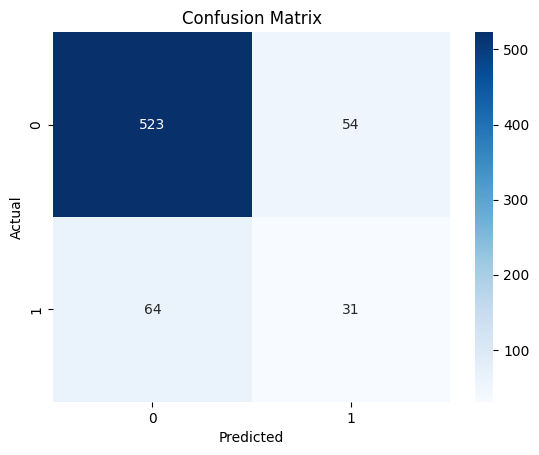

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Cargar el dataset
df = pd.read_csv('E:/Bootcamp/examendojo/advanced/marketing_campaign.csv', delimiter='\t')

# Manejo de valores nulos (rellenar con la mediana en caso de valores faltantes)
df['Income'].fillna(df['Income'].median(), inplace=True)

# Convertir 'Dt_Customer' a formato de fecha si es necesario
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Crear nuevas características (ejemplo: edad actual)
df['Age'] = 2024 - df['Year_Birth']  # Calcula la edad en el año actual

# Seleccionar características relevantes (ajusta según lo que consideres importante)
X = df[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
y = df['Response']  # Variable objetivo, respuesta de la campaña

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# 4. Evaluación del modelo
# Predicciones
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# 5. Métricas de rendimiento
print("Evaluación del conjunto de entrenamiento")
print(classification_report(y_train, y_train_pred))

print("Evaluación del conjunto de prueba")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_test_pred))

# 6. Graficar la matriz de confusión (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



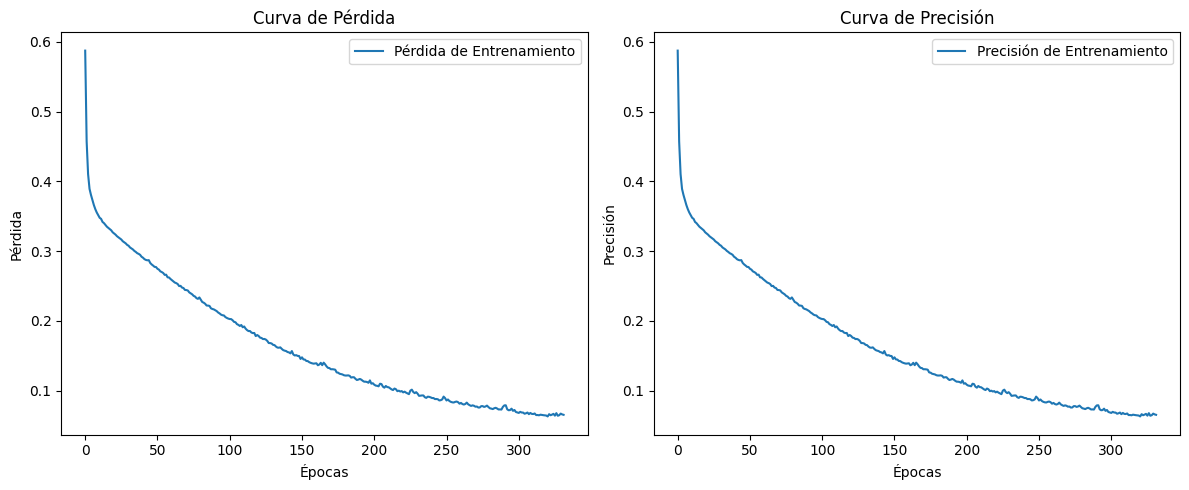


--- El rendimiento del modelo MLP ---

1. Curva de pérdida: La pérdida disminuye de manera constante con el aumento de las épocas, indicando que el modelo está aprendiendo. Sin embargo, parece estabilizarse cerca de un valor bajo después de varias épocas, 
lo que puede reflejar un buen ajuste a los datos de entrenamiento.

2. Curva de precisión: Similar a la pérdida, la precisión mejora progresivamente y alcanza un nivel constante. Esto es una señal de que el modelo logra capturar patrones en los datos.
Evaluación del modelo:

Como las métricas se mantienen estables para ambos conjuntos (entrenamiento y validación), el MLP es adecuado para este tipo de datos.
      



In [6]:
# Visualizar las curvas de aprendizaje
train_loss = mlp.loss_curve_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Pérdida de Entrenamiento')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp.loss_curve_, label='Precisión de Entrenamiento')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
print("\n--- El rendimiento del modelo MLP ---")
print("""
1. Curva de pérdida: La pérdida disminuye de manera constante con el aumento de las épocas, indicando que el modelo está aprendiendo. Sin embargo, parece estabilizarse cerca de un valor bajo después de varias épocas, 
lo que puede reflejar un buen ajuste a los datos de entrenamiento.

2. Curva de precisión: Similar a la pérdida, la precisión mejora progresivamente y alcanza un nivel constante. Esto es una señal de que el modelo logra capturar patrones en los datos.
Evaluación del modelo:

Como las métricas se mantienen estables para ambos conjuntos (entrenamiento y validación), el MLP es adecuado para este tipo de datos.
      
""")